In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the data
JC240_data = pd.read_csv('JC240_data.csv')
JC241_data = pd.read_csv('JC241_data.csv')

# Show data
JC240_data.head()
JC241_data.head()

,Session_ID,Flavor,Arm,Correct,CorrectBool
0,1,H,3,N,0
1,1,H,7,Y,1
2,1,H,4,N,0
3,1,H,7,Y,1
4,1,H,2,N,0


In [68]:
# Calculate accuracy for over all sessions for a given animal
def get_accuracy(JCxxx):
    data_JCxxx = str(JCxxx) + "_data" # concatenate strings
    data_JCxxx = globals()[data_JCxxx] # convert string to variable
    bysession_JCxxx = data_JCxxx.groupby("Session_ID")
    sessions = bysession_JCxxx["Session_ID"].unique()
    accuracy = np.zeros(len(sessions))
    for session in range(1, len(sessions)+1):
        accuracy[session-1] = round(bysession_JCxxx.get_group(session)["CorrectBool"].sum() / bysession_JCxxx.get_group(session).count()[0]*100, 0)
        numSessions[session-1] = session
    return accuracy, sessions
    
accuracy_JC240, sessions_JC240 = get_accuracy("JC240")
accuracy_JC241, sessions_JC241 = get_accuracy("JC241")

In [93]:
# Calculate arm choice by session

# group by session
def get_arm_choice(JCxxx):
    data_JCxxx = str(JCxxx) + "_data"
    data_JCxxx = globals()[data_JCxxx]
    bysession_JCxxx = data_JCxxx.groupby("Session_ID")
    sessions = bysession_JCxxx["Session_ID"].unique()
    num_arms = 3
    arm_choice = np.zeros((len(sessions), num_arms))
    print(arm_choice.shape)
    for session in range(1, len(sessions)+1):
        print("session: ", session)
        for arm in range(1, num_arms):
            arm_choice[session-1][arm] = arm
            print("arm: ", arm)
    return arm_choice

arm_choice = get_arm_choice("JC240")

# count arm choice for arm 3, 7, and other
# divide arm choice count by total trials
# return percent

(16, 3)
session:  1
arm:  1
arm:  2
session:  2
arm:  1
arm:  2
session:  3
arm:  1
arm:  2
session:  4
arm:  1
arm:  2
session:  5
arm:  1
arm:  2
session:  6
arm:  1
arm:  2
session:  7
arm:  1
arm:  2
session:  8
arm:  1
arm:  2
session:  9
arm:  1
arm:  2
session:  10
arm:  1
arm:  2
session:  11
arm:  1
arm:  2
session:  12
arm:  1
arm:  2
session:  13
arm:  1
arm:  2
session:  14
arm:  1
arm:  2
session:  15
arm:  1
arm:  2
session:  16
arm:  1
arm:  2


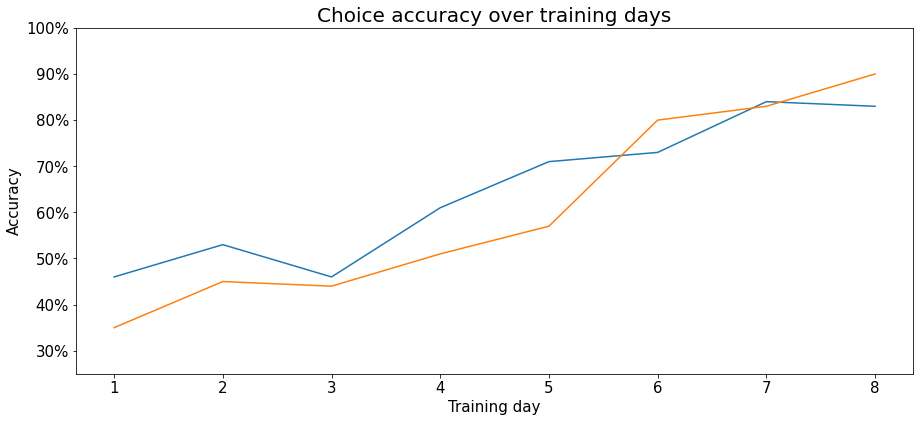

In [66]:
# Plot accuracy and arm choice before third flavor introduced
fig = plt.figure(figsize=(15,14))

# Accuracy
ax1 = fig.add_subplot(211)
ax1.plot(sessions_JC240[0:8], accuracy_JC240[0:8])
ax1.plot(sessions_JC241[0:8], accuracy_JC241[0:8])
ax1.set_title("Choice accuracy over training days", fontsize=20)
ax1.set_xlabel("Training day", fontsize=15)
ax1.tick_params(labelsize=15)
ax1.set_ylabel("Accuracy", fontsize=15)
ax1.yaxis.set_major_formatter('{x:,.0f}%')
ax1.set_ylim(25,100)

plt.show()